# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [121]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [122]:
#edit the file location of raw data set
cust_df=pd.read_csv("e:/aine/project8/project8/data/Telecom Data.csv")
pred_df=pd.read_csv("e:/aine/project8/project8/data/Telecom - Prediction Data.csv")

## Exercise

## Placeholder for your analysis

In [123]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

(51047, 58)

In [124]:
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [125]:
cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [126]:
#check any duplicate customer are present
cust_df.CustomerID.nunique()/cust_df.shape[0]
pred_df.CustomerID.nunique()/pred_df.shape[0]

1.0

1.0

In [127]:
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [128]:
len(pred_df.columns), len(cust_df.columns)

(58, 58)

In [129]:
cust_df.Churn.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [130]:
100*cust_df.Churn.value_counts()/cust_df.shape[0]

No     71.18146
Yes    28.81854
Name: Churn, dtype: float64

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [131]:
#How many customers had zero monthly revenue?
cust_df[cust_df.MonthlyRevenue==0].shape[0]



6

<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>
    6 customers have 0 monthly revenue

In [132]:
#Exclude the customers with zero monthly revenue from cust_df
cust_df=cust_df[cust_df.MonthlyRevenue>0.0]
#Exclude the customers with zero Monthly Minutes from cust_df
cust_df=cust_df[cust_df["MonthlyMinutes"]>0.0]

cust_df.shape

(50162, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [133]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%

100*cust_df.isnull().sum()/cust_df.shape[0]

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.344883
PercChangeRevenues           0.344883
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>

Below 5 features are having missing values. None of columns has missing values percentage > 5%

|Feature |%Percetage of Missing Values|
|:-----|:----:|
|PercChangeMinutes |0.3449|
|PercChangeRevenues|0.3449|
|AgeHH1|1.7723|
|AgeHH2|1.7723|
|ServiceArea|0.0478|
   

In [134]:
#What strategy should be used for imputation?
cust_df.dropna(axis=0,inplace=True)
cust_df.shape

(49078, 58)

<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>
    Dropped rows which are having missing values. Around 2% of rows are dropped (records reduced from 50162 to 49078)

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

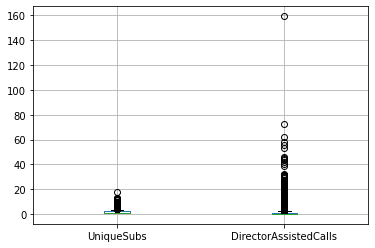

In [135]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [136]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
q_value=[i/100 for i in range (95,101,1)]
cust_df[cols].quantile(q_value)



,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,18.0,159.39


In [137]:
## filtering cust_df data with 99% value
cust_df=cust_df[(cust_df.UniqueSubs<=5) & (cust_df.DirectorAssistedCalls<9.6156)]


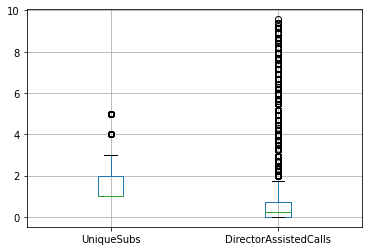

In [138]:
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

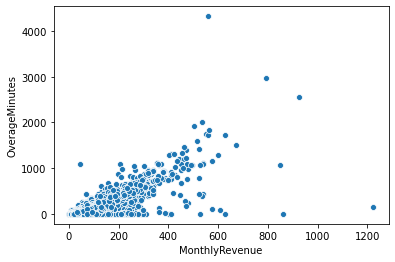

In [139]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

Text(0.5, 1.0, 'Non Churned customer')

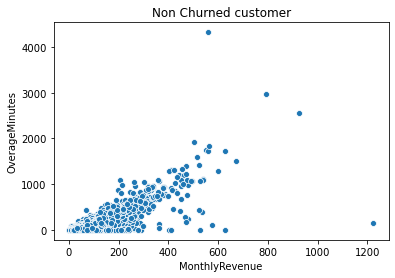

In [140]:
#use scatter plot to find the correlation between monthly revenue and overage minutes for Non Churned Customers
plt.title("Non Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="No"])
plt.show()

Text(0.5, 1.0, 'Churned customer')

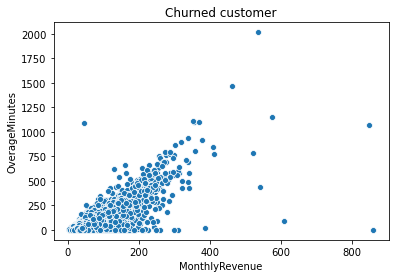

In [141]:
#use scatter plot to find the correlation between monthly revenue and overage minutes for Churned Customers
plt.title("Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="Yes"])
plt.show()

<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>
MonthlyRevenue and OverageMinutes has positive correlation. Few outliers are present. Churned Customer has  more outliers.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

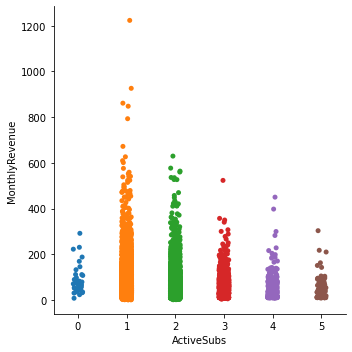

In [142]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs",y="MonthlyRevenue",data=cust_df) 

<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>

When number of active subscriptions increases, monthly revenue decreases

### Q2.3 Does credit rating have an impact in churn rate?

In [143]:
pd.crosstab(cust_df.Churn,cust_df.CreditRating).apply(lambda r:r/r.sum(),axis=0)
pd.crosstab(cust_df.Churn,cust_df.CreditRating).apply(lambda r:r/r.sum(),axis=1)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.698608,0.7039,0.69738,0.745876,0.785889,0.739905,0.718026
Yes,0.301392,0.2961,0.30262,0.254124,0.214111,0.260095,0.281974


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.161849,0.371062,0.160179,0.109358,0.138555,0.017938,0.041060
Yes,0.177734,0.397318,0.176928,0.094840,0.096086,0.016051,0.041044


<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>
Proportion of churned customer is high on 'high credit score'. There is no definite trend found, with respect to credit score.

### Placeholder for additional exploratory analysis

In [144]:
#type your code here for any additional exploratory analysis (if any)



## Q3. Create additional features to help predict churn

In [145]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']=cust_df['TotalRecurringCharge']/cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minute']=cust_df['OverageMinutes']/cust_df['MonthlyMinutes']

   

    #type your code here to creat any other additional features which you think will help improve your model accuracy
    cust_df['perc_roaming_calls']=cust_df['RoamingCalls']/cust_df['MonthlyMinutes']
    
    cust_df['perc_droppped_calls']=cust_df['DroppedCalls']/cust_df['MonthlyMinutes']
    
    cust_df['perc_blocked_calls']=cust_df['BlockedCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_unanswered_calls']=cust_df['UnansweredCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_customercare_calls']=cust_df['CustomerCareCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_threeway_calls']=cust_df['ThreewayCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_received_calls']=cust_df['ReceivedCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_outbound_calls']=cust_df['OutboundCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_inbound_calls']=cust_df['InboundCalls']/cust_df['MonthlyMinutes']



    return cust_df  


In [146]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)
pred_df=create_features(pred_df)


In [147]:
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,perc_overage_minute,perc_roaming_calls,perc_droppped_calls,perc_blocked_calls,perc_unanswered_calls,perc_customercare_calls,perc_threeway_calls,perc_received_calls,perc_outbound_calls,perc_inbound_calls
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0.0,0.0,0.003196,0.003196,0.028767,0.000000,0.000000,0.443836,0.000000,0.000000
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0.0,0.0,0.030000,0.000000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.037500,0.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.0,0.0,0.039634,0.005869,0.057927,0.003277,0.000991,0.152668,0.282241,0.112043
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0.0,0.0,0.013196,0.002493,0.019062,0.001026,0.000000,0.061877,0.009824,0.000000


In [148]:
pred_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,perc_overage_minute,perc_roaming_calls,perc_droppped_calls,perc_blocked_calls,perc_unanswered_calls,perc_customercare_calls,perc_threeway_calls,perc_received_calls,perc_outbound_calls,perc_inbound_calls
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0.047619,0.000000,0.017184,0.002070,0.126915,0.003520,0.000621,0.114493,0.095859,0.013043
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0.000000,0.000000,0.017018,0.001228,0.135088,0.015263,0.000000,0.186491,0.025789,0.001228
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0.404235,0.000000,0.012223,0.002887,0.169394,0.010876,0.000289,0.205871,0.099423,0.000289
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0.104575,0.000000,0.013072,0.004575,0.113072,0.000000,0.000000,0.216340,0.052288,0.030719
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0.000000,0.001072,0.002226,0.004946,0.036026,0.003545,0.000000,0.404040,0.041797,0.006843


In [149]:
def check_categorical(cust_df):
    colnames=cust_df.columns
    categorical_cols=[]
    continous_cols=[]
    
    for i in colnames:
        
        if cust_df[i].nunique() < 20:
            if i!="Churn":
                categorical_cols.append(i)
        else:
            if i not in ["CustomerID","ServiceArea"]:
                continous_cols.append(i)
    return(categorical_cols,continous_cols)
                

In [150]:
def check_categorical_imp(cust_df,categorical_cols):
    new_categorical_cols=[]
    for i in categorical_cols:
        if stats.chi2_contingency(pd.crosstab(cust_df.Churn,cust_df[i]))[1]>0.05:
            pass
        else:
            new_categorical_cols.append(i)
    return new_categorical_cols

In [151]:
categorical_cols,continous_cols=check_categorical(cust_df)

In [152]:
categorical_cols

['UniqueSubs',
 'ActiveSubs',
 'HandsetModels',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRating',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus',
 'perc_active_subs']

In [153]:
continous_cols

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'Handsets',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'perc_recurrent_charge',
 'perc_overage_minute',
 'perc_roaming_calls',
 'perc_droppped_calls',
 'perc_blocked_calls',
 'perc_unanswered_calls',
 'perc_customercare_calls',
 'perc_threeway_calls',
 'perc_received_calls',
 'perc_outbound_calls',
 'perc_inbound_calls']

In [154]:
imp_categorical_cols=check_categorical_imp(cust_df,categorical_cols)

In [155]:
len(imp_categorical_cols)

18

In [156]:
len(categorical_cols)

30

In [157]:
cust_df.shape

(48374, 70)

In [158]:
cust_df.Churn.value_counts()

No     34730
Yes    13644
Name: Churn, dtype: int64

In [159]:
cust_df['Churn']=cust_df['Churn'].replace(["Yes","No"],[1,0])
class_count_0,class_count_1=cust_df["Churn"].value_counts()

In [160]:
class_count_0,class_count_1

(34730, 13644)

In [161]:
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,perc_overage_minute,perc_roaming_calls,perc_droppped_calls,perc_blocked_calls,perc_unanswered_calls,perc_customercare_calls,perc_threeway_calls,perc_received_calls,perc_outbound_calls,perc_inbound_calls
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0.0,0.0,0.003196,0.003196,0.028767,0.000000,0.000000,0.443836,0.000000,0.000000
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0.0,0.0,0.030000,0.000000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.037500,0.000000
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.0,0.0,0.039634,0.005869,0.057927,0.003277,0.000991,0.152668,0.282241,0.112043
5,3000030,0,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0.0,0.0,0.013196,0.002493,0.019062,0.001026,0.000000,0.061877,0.009824,0.000000


In [162]:
class_0=cust_df[cust_df["Churn"]==0]
class_1=cust_df[cust_df["Churn"]==1]

In [163]:
class_0.shape, class_1.shape

((34730, 70), (13644, 70))

In [164]:
class_1_over=class_1.sample(class_count_0,replace=True)

In [165]:
class_0.shape, class_1_over.shape

((34730, 70), (34730, 70))

In [166]:
test_over=pd.concat([class_1_over,class_0],axis=0)
test_over.shape

(69460, 70)

In [167]:
cust_df=test_over

In [168]:
y=cust_df.Churn
y.value_counts()/len(y)*100

1    50.0
0    50.0
Name: Churn, dtype: float64

## Q4. Build classification model to predict customer churn month in advance

### Drop Unwanted columns

In [169]:
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,perc_overage_minute,perc_roaming_calls,perc_droppped_calls,perc_blocked_calls,perc_unanswered_calls,perc_customercare_calls,perc_threeway_calls,perc_received_calls,perc_outbound_calls,perc_inbound_calls
36795,3293906,1,35.38,482.0,45.0,0.0,1.0,0.0,175.0,1.2,...,0.002075,0.000000,0.002697,0.000000,0.024896,0.000622,0.002075,0.179253,0.058091,0.015975
20800,3163042,1,35.76,588.0,30.0,0.0,4.0,0.0,-97.0,-1.6,...,0.006803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37994,3302858,1,59.53,425.0,50.0,0.0,17.0,0.5,58.0,-5.5,...,0.040000,0.001176,0.013412,0.011059,0.022824,0.000000,0.000000,0.294824,0.022824,0.006353
31913,3254210,1,52.39,438.0,40.0,0.0,64.0,0.0,-120.0,-22.4,...,0.146119,0.000000,0.013014,0.049543,0.057763,0.000000,0.000000,0.092237,0.001598,0.000000
28454,3225802,1,69.99,26.0,80.0,0.0,0.0,0.0,-25.0,0.0,...,0.000000,0.000000,0.011538,0.011538,0.088462,0.000000,0.000000,0.000000,0.026923,0.000000


In [170]:
cust_df.shape

(69460, 70)

In [171]:
cols_tobe_droppped=[]
for col in categorical_cols: 
    if col not in imp_categorical_cols:
        cols_tobe_droppped.append(col)

In [172]:
len(cols_tobe_droppped)

12

In [173]:
cols_tobe_droppped

['ChildrenInHH',
 'TruckOwner',
 'RVOwner',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRating',
 'Occupation']

In [174]:
len(categorical_cols)

30

In [175]:
len(imp_categorical_cols)

18

In [176]:
#drop unwanted columns
cust_df=cust_df.drop(["CustomerID","Churn"],axis=1) #drop customerid. churn column
pred_df=pred_df.drop(["Churn"],axis=1) #drop customerid. churn column

In [177]:
cust_df.shape
pred_df.shape

(69460, 68)

(20000, 69)

In [178]:
cust_df=cust_df.drop(cols_tobe_droppped,axis=1) #drop  un-iumportant columns
pred_df=pred_df.drop(cols_tobe_droppped,axis=1) #drop  un-iumportant columns

In [179]:
cust_df.shape
pred_df.shape

(69460, 56)

(20000, 57)

In [180]:
#drop unwanted columns
cust_df=cust_df.drop(["ServiceArea"],axis=1) 
pred_df=pred_df.drop(["ServiceArea"],axis=1) 


In [181]:
cust_df.shape
pred_df.shape

(69460, 55)

(20000, 56)

In [182]:
cust_df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,perc_overage_minute,perc_roaming_calls,perc_droppped_calls,perc_blocked_calls,perc_unanswered_calls,perc_customercare_calls,perc_threeway_calls,perc_received_calls,perc_outbound_calls,perc_inbound_calls
36795,35.38,482.0,45.0,0.0,1.0,0.0,175.0,1.2,1.3,0.0,...,0.002075,0.000000,0.002697,0.000000,0.024896,0.000622,0.002075,0.179253,0.058091,0.015975
20800,35.76,588.0,30.0,0.0,4.0,0.0,-97.0,-1.6,0.0,0.0,...,0.006803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37994,59.53,425.0,50.0,0.0,17.0,0.5,58.0,-5.5,5.7,4.7,...,0.040000,0.001176,0.013412,0.011059,0.022824,0.000000,0.000000,0.294824,0.022824,0.006353
31913,52.39,438.0,40.0,0.0,64.0,0.0,-120.0,-22.4,5.7,21.7,...,0.146119,0.000000,0.013014,0.049543,0.057763,0.000000,0.000000,0.092237,0.001598,0.000000
28454,69.99,26.0,80.0,0.0,0.0,0.0,-25.0,0.0,0.3,0.3,...,0.000000,0.000000,0.011538,0.011538,0.088462,0.000000,0.000000,0.000000,0.026923,0.000000


###  Scale Continous Variables

In [183]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split
#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



In [184]:
#categorical_cols,continous_cols

## Scaling continous values in dataframe
cust_df[continous_cols]=sc.fit_transform(cust_df[continous_cols])

In [185]:
## Scaling continous values in dataframe
pred_df = pred_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
pred_df[continous_cols]=sc.fit_transform(pred_df[continous_cols])

In [186]:
cust_df.shape
pred_df.shape

(69460, 55)

(19256, 56)

In [187]:
PredCustomerID=pred_df["CustomerID"]
pred_df=pred_df.drop(["CustomerID"],axis=1) 


In [188]:
cust_df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,perc_overage_minute,perc_roaming_calls,perc_droppped_calls,perc_blocked_calls,perc_unanswered_calls,perc_customercare_calls,perc_threeway_calls,perc_received_calls,perc_outbound_calls,perc_inbound_calls
36795,-0.537753,-0.061241,-0.053299,-0.54079,-0.424840,-0.125389,0.745322,0.059324,-0.528790,-0.385171,...,-0.552441,-0.193446,-0.533564,-0.284548,-0.368741,-0.131470,0.304692,0.019849,0.142203,0.098982
20800,-0.528822,0.148145,-0.705281,-0.54079,-0.392138,-0.125389,-0.314004,-0.013403,-0.676474,-0.385171,...,-0.510843,-0.193446,-0.663369,-0.284548,-0.591379,-0.156074,-0.160005,-1.249624,-0.985739,-0.660291
37994,0.029854,-0.173836,0.164029,-0.54079,-0.250426,-0.076500,0.289656,-0.114703,-0.028935,0.064298,...,-0.218774,-0.136823,-0.017891,0.023972,-0.387277,-0.156074,-0.160005,0.838321,-0.542581,-0.358345
31913,-0.137960,-0.148156,-0.270626,-0.54079,0.261914,-0.125389,-0.403579,-0.553666,-0.028935,1.690036,...,0.714859,-0.193446,-0.037049,1.097617,-0.074831,-0.156074,-0.160005,-0.596397,-0.954708,-0.660291
28454,0.275700,-0.961998,1.467993,-0.54079,-0.435741,-0.125389,-0.033594,0.028155,-0.642393,-0.356482,...,-0.570694,-0.193446,-0.108049,0.037353,0.199698,-0.156074,-0.160005,-1.249624,-0.462981,-0.660291


In [189]:
pred_df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,perc_overage_minute,perc_roaming_calls,perc_droppped_calls,perc_blocked_calls,perc_unanswered_calls,perc_customercare_calls,perc_threeway_calls,perc_received_calls,perc_outbound_calls,perc_inbound_calls
0,-0.040680,-0.093713,-0.428776,-0.309466,-0.183139,-0.176998,2.160071,1.420871,0.246531,-0.307604,...,-0.130789,-0.205157,0.128916,-0.132018,0.394023,-0.011907,-0.022460,-0.457388,0.895964,-0.044673
1,-0.092707,0.070703,1.033751,-0.428130,-0.423189,-0.176998,0.188812,0.034072,0.403143,-0.337527,...,-0.563222,-0.205157,0.122746,-0.144407,0.447638,0.260713,-0.195206,0.071204,-0.491040,-0.599894
2,0.876705,0.957036,0.114448,1.921411,3.960330,-0.176998,0.827276,0.667648,0.738741,-0.108118,...,3.107677,-0.205157,-0.054678,-0.120001,0.672696,0.158863,-0.114902,0.213485,0.966499,-0.644034
3,-0.544838,-0.717358,-0.721281,-0.428130,-0.256198,-0.176998,0.156889,0.232574,-0.458224,-0.337527,...,0.386436,-0.205157,-0.023273,-0.095176,0.303206,-0.093615,-0.195206,0.290344,0.033480,0.785921
4,-0.091786,1.285867,0.114448,-0.076885,-0.423189,0.015500,0.711555,0.061264,-0.379918,0.191111,...,-0.563222,-0.145256,-0.424658,-0.089715,-0.202238,-0.011321,-0.195206,1.668380,-0.174173,-0.336063


In [190]:
y.value_counts()

1    34730
0    34730
Name: Churn, dtype: int64

In [191]:
y.value_counts()/len(y)*100

1    50.0
0    50.0
Name: Churn, dtype: float64

In [192]:
len(imp_categorical_cols)

18

In [193]:
cust_df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,perc_overage_minute,perc_roaming_calls,perc_droppped_calls,perc_blocked_calls,perc_unanswered_calls,perc_customercare_calls,perc_threeway_calls,perc_received_calls,perc_outbound_calls,perc_inbound_calls
36795,-0.537753,-0.061241,-0.053299,-0.54079,-0.424840,-0.125389,0.745322,0.059324,-0.528790,-0.385171,...,-0.552441,-0.193446,-0.533564,-0.284548,-0.368741,-0.131470,0.304692,0.019849,0.142203,0.098982
20800,-0.528822,0.148145,-0.705281,-0.54079,-0.392138,-0.125389,-0.314004,-0.013403,-0.676474,-0.385171,...,-0.510843,-0.193446,-0.663369,-0.284548,-0.591379,-0.156074,-0.160005,-1.249624,-0.985739,-0.660291
37994,0.029854,-0.173836,0.164029,-0.54079,-0.250426,-0.076500,0.289656,-0.114703,-0.028935,0.064298,...,-0.218774,-0.136823,-0.017891,0.023972,-0.387277,-0.156074,-0.160005,0.838321,-0.542581,-0.358345
31913,-0.137960,-0.148156,-0.270626,-0.54079,0.261914,-0.125389,-0.403579,-0.553666,-0.028935,1.690036,...,0.714859,-0.193446,-0.037049,1.097617,-0.074831,-0.156074,-0.160005,-0.596397,-0.954708,-0.660291
28454,0.275700,-0.961998,1.467993,-0.54079,-0.435741,-0.125389,-0.033594,0.028155,-0.642393,-0.356482,...,-0.570694,-0.193446,-0.108049,0.037353,0.199698,-0.156074,-0.160005,-1.249624,-0.462981,-0.660291


In [194]:
cust_df[imp_categorical_cols]

,UniqueSubs,ActiveSubs,HandsetModels,HandsetRefurbished,HandsetWebCapable,Homeownership,BuysViaMailOrder,RespondsToMailOffers,HasCreditCard,RetentionCalls,RetentionOffersAccepted,IncomeGroup,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,MaritalStatus,perc_active_subs
36795,1,1,2.0,No,Yes,Unknown,No,No,No,0,0,0,80,No,2-High,Town,Unknown,1.0
20800,1,1,2.0,No,Yes,Unknown,No,No,No,0,0,0,30,No,5-Low,Other,Unknown,1.0
37994,2,1,1.0,No,Yes,Known,No,No,Yes,0,0,4,Unknown,No,3-Good,Other,No,0.5
31913,1,1,1.0,No,Yes,Known,Yes,Yes,Yes,0,0,6,Unknown,No,2-High,Rural,Yes,1.0
28454,2,2,1.0,No,Yes,Unknown,No,No,No,0,0,0,Unknown,No,1-Highest,Rural,Unknown,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51030,1,1,3.0,No,Yes,Known,No,No,No,0,0,2,80,No,3-Good,Other,No,1.0
51032,1,1,2.0,No,Yes,Unknown,No,Yes,No,1,1,3,30,Yes,1-Highest,Town,Unknown,1.0
51037,1,1,1.0,No,Yes,Known,Yes,Yes,Yes,0,0,3,Unknown,No,3-Good,Other,Yes,1.0
51040,1,1,1.0,No,No,Known,Yes,Yes,Yes,0,0,7,Unknown,No,1-Highest,Other,Unknown,1.0


In [195]:
completeDataset = pd.concat(objs=[cust_df, pred_df], axis=0)
completeDataset.shape

(88716, 55)

In [196]:
dataset_preprocessed = pd.get_dummies(completeDataset)
cust_df = dataset_preprocessed[:len(cust_df)]
pred_df = dataset_preprocessed[len(cust_df):]

In [197]:
cust_df.shape

(69460, 88)

In [198]:
pred_df.shape

(19256, 88)

In [199]:
cust_df.shape

(69460, 88)

In [200]:
cust_df.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted', 'IncomeGroup',
       'perc_active_subs', 'perc_recurrent_charge', 'perc_overage_minute',
       'perc_roaming_calls', 'perc_droppped_calls', 'perc_blocked_calls',
       'perc_unanswered_calls', 'perc_customercare_calls',
       'perc_threeway_calls', 'perc_received_calls', 'perc_outbound_calls',
       'perc_inbound_calls', 'HandsetRefurbished_No', 'HandsetRefur

In [201]:
X=cust_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [202]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((48622, 88), (20838, 88), (48622,), (20838,))

In [203]:
y_train.value_counts()

1    24462
0    24160
Name: Churn, dtype: int64

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [204]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,f1_score,plot_confusion_matrix, average_precision_score


In [205]:
#type your code to build logistic regression model on training data set
model=LogisticRegression(random_state=0)
logistic_classifier=model.fit(X_train,y_train)
logistic_predict_train_output=logistic_classifier.predict_proba(X_train)[:,1]

In [206]:
#-------------------------------- Model testing ---------------------------------#
#type your code here to predict for X_test data set using the fitted model
logistic_predict_test_output=logistic_classifier.predict_proba(X_test)[:,1]

### Evaluate model accuracy using fitted y value and actual y_test

In [207]:
import copy
def efficient_cutoff(actual_value,predicted):
    prob_cutoff=[]
    f1_score_val=[]
    for i in range(0,101):
        predicted_x=copy.deepcopy(predicted)
        predicted_x[predicted_x >= i/100 ]=1
        predicted_x[predicted_x < i/100 ]=0
        prob_cutoff.append(i/100)
        f1_score_val.append(f1_score(actual_value,predicted_x))
    return (prob_cutoff,f1_score_val)


In [208]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
prob_cutoff_train,f1_score_val_train=efficient_cutoff(y_train,logistic_predict_train_output)

Text(0.5, 0, 'Probability cutoff value - train-set')

Text(0, 0.5, 'f1 score train')

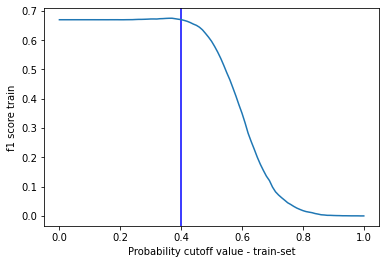

In [209]:
plt.xlabel("Probability cutoff value - train-set")
plt.axvline(x=0.4,color='b',label='avxline-full height')
plt.ylabel("f1 score train")
plt.plot(prob_cutoff_train,f1_score_val_train)
plt.show()

In [210]:
prob_cutoff_test,f1_score_val_test=efficient_cutoff(y_test,logistic_predict_test_output)

Text(0.5, 0, 'Probability cutoff value - test-set')

Text(0, 0.5, 'f1 score train')

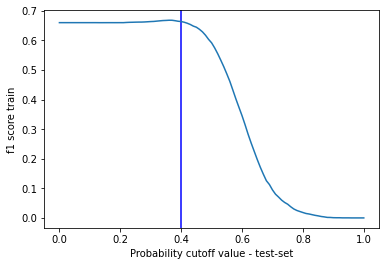

In [211]:
plt.xlabel("Probability cutoff value - test-set")
plt.axvline(x=0.4,color='b',label='avxline-full height')
plt.ylabel("f1 score train")
plt.plot(prob_cutoff_test,f1_score_val_test)
plt.show()

In [212]:
logistic_predict_test_class=copy.deepcopy(logistic_predict_test_output)

In [213]:

logistic_predict_test_class[logistic_predict_test_output>=0.4]=1
logistic_predict_test_class[logistic_predict_test_output<0.4]=0


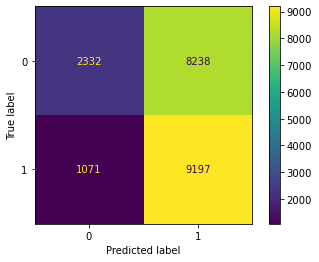

In [214]:
#confusion matrix
cm=confusion_matrix(y_test,logistic_predict_test_class)
disp=ConfusionMatrixDisplay(cm)
disp.plot()


In [215]:
# Precision, Recall
print(classification_report(y_test,logistic_predict_test_class))


              precision    recall  f1-score   support

           0       0.69      0.22      0.33     10570
           1       0.53      0.90      0.66     10268

    accuracy                           0.55     20838
   macro avg       0.61      0.56      0.50     20838
weighted avg       0.61      0.55      0.50     20838



In [216]:
 test_auc_score=roc_auc_score(y_test, logistic_predict_test_output)
print("gini:{}".format(2*test_auc_score-1))
print("ROC-AUC Score:{}".format(test_auc_score))
print("Auccuracy:{}".format(accuracy_score(y_test, logistic_predict_test_class)))

gini:0.25288493538725065
ROC-AUC Score:0.6264424676936253
Auccuracy:0.5532680679527786


### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [217]:
from sklearn.ensemble import RandomForestClassifier


In [218]:
#-------------------------------- Model training -------------------------------#
clf=RandomForestClassifier(max_depth=15,min_samples_split=50,random_state=40,criterion="entropy",n_estimators=350,n_jobs=-1)
#type your code to build random forest classifier model on training data set
clf.fit(X_train,y_train)




RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=50,
                       n_estimators=350, n_jobs=-1, random_state=40)

In [219]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
rf_train_output=clf.predict_proba(X_train)[:,1]

rf_test_output=clf.predict_proba(X_test)[:,1]





In [220]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
rf_prob_cutoff_train,rf_f1_score_val_train=efficient_cutoff(y_train,rf_train_output)
rf_prob_cutoff_test,rf_f1_score_val_test=efficient_cutoff(y_test,rf_test_output)




Text(0.5, 0, 'Probability cutoff value - train-set')

Text(0, 0.5, 'f1 score train')

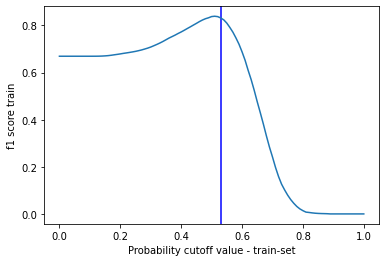

In [221]:
plt.xlabel("Probability cutoff value - train-set")
plt.axvline(x=0.53,color='b',label='avxline-full height')
plt.ylabel("f1 score train")
plt.plot(rf_prob_cutoff_train,rf_f1_score_val_train)
plt.show()

Text(0.5, 0, 'Probability cutoff value - test-set')

Text(0, 0.5, 'f1 score train')

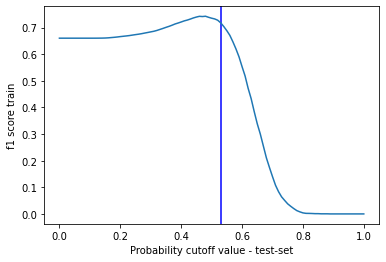

In [222]:
plt.xlabel("Probability cutoff value - test-set")
plt.axvline(x=0.53,color='b',label='avxline-full height')
plt.ylabel("f1 score train")
plt.plot(rf_prob_cutoff_test,rf_f1_score_val_test)
plt.show()

(array([  710.,  1866.,  4065.,  6033.,  8903., 10627.,  8864.,  5887.,
         1563.,   104.]),
 array([0.10473056, 0.18280703, 0.2608835 , 0.33895998, 0.41703645,
        0.49511292, 0.57318939, 0.65126586, 0.72934234, 0.80741881,
        0.88549528]),
 <a list of 10 Patch objects>)

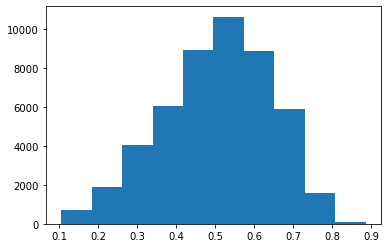

In [223]:
plt.hist(rf_train_output)

(array([ 246.,  671., 1393., 2638., 4176., 5455., 4183., 1749.,  316.,
          11.]),
 array([0.11578854, 0.19275921, 0.26972989, 0.34670056, 0.42367124,
        0.50064191, 0.57761258, 0.65458326, 0.73155393, 0.80852461,
        0.88549528]),
 <a list of 10 Patch objects>)

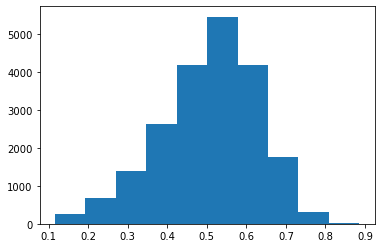

In [224]:
plt.hist(rf_test_output)

In [225]:
#Evaluate model accuracy using fitted y value and actual y_test
rf_test_class=copy.deepcopy(rf_test_output)



In [226]:

rf_test_class[rf_test_output>=0.53]=1
rf_test_class[rf_test_output<0.53]=0


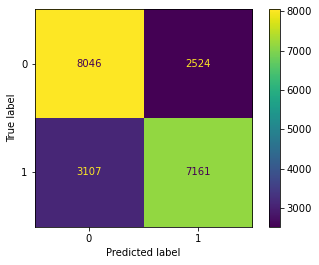

In [227]:
#confusion matrix
cm=confusion_matrix(y_test,rf_test_class)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [228]:
# Precision, Recall
print(classification_report(y_test,rf_test_class))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10570
           1       0.74      0.70      0.72     10268

    accuracy                           0.73     20838
   macro avg       0.73      0.73      0.73     20838
weighted avg       0.73      0.73      0.73     20838



In [229]:
 rf_test_auc_score=roc_auc_score(y_test, rf_test_output)
print("gini:{}".format(2*rf_test_auc_score-1))
print("ROC-AUC Score:{}".format(rf_test_auc_score))
print("Accuracy:{}".format(accuracy_score(y_test, rf_test_class)))

gini:0.621944544670199
ROC-AUC Score:0.8109722723350995
Accuracy:0.7297725309530665


<mark>__Result:__
    
According below metrics, random forest gives accuracy.
    
|Metric |Logistic Regression|Random Forest|
|:-----|:----|:----:|
|Accuracy |55%|72.6%|
|Precision |60%|73%|
|Recall |55%|72%|
|F1-score|50%|73%|
|Gini|24%|61.1%|
|ROC-AUC Score|62%|80.%| 

### Q4.3 Identify most important features impacting churn

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'feature Importance plot')

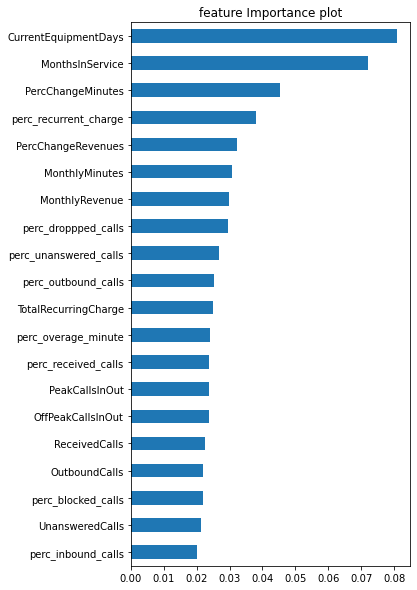

In [230]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feat_imporatances=pd.Series(clf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(5,10))
plt.title("feature Importance plot")
feat_imporatances.nlargest(20).sort_values(ascending=True).plot(kind='barh',)


## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [231]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object



In [232]:
pred_df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,-0.040680,-0.093713,-0.428776,-0.309466,-0.183139,-0.176998,2.160071,1.420871,0.246531,-0.307604,...,1,0,0,1,0,0,0,1,0,0
1,-0.092707,0.070703,1.033751,-0.428130,-0.423189,-0.176998,0.188812,0.034072,0.403143,-0.337527,...,0,0,0,1,0,0,0,1,0,0
2,0.876705,0.957036,0.114448,1.921411,3.960330,-0.176998,0.827276,0.667648,0.738741,-0.108118,...,0,0,0,0,0,1,0,0,0,1
3,-0.544838,-0.717358,-0.721281,-0.428130,-0.256198,-0.176998,0.156889,0.232574,-0.458224,-0.337527,...,0,0,0,1,0,0,0,1,0,0
4,-0.091786,1.285867,0.114448,-0.076885,-0.423189,0.015500,0.711555,0.061264,-0.379918,0.191111,...,0,0,0,0,0,1,0,1,0,0


In [233]:
pred_df.shape

(19256, 88)

### Use "predict" function on the transformend data using the best fitted model object

In [234]:
pred_df["Churn"]=clf.predict_proba(pred_df)[:,1]


In [235]:
pred_df.shape

(19256, 89)

In [236]:
pred_df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,Churn
0,-0.040680,-0.093713,-0.428776,-0.309466,-0.183139,-0.176998,2.160071,1.420871,0.246531,-0.307604,...,0,0,1,0,0,0,1,0,0,0.350553
1,-0.092707,0.070703,1.033751,-0.428130,-0.423189,-0.176998,0.188812,0.034072,0.403143,-0.337527,...,0,0,1,0,0,0,1,0,0,0.399411
2,0.876705,0.957036,0.114448,1.921411,3.960330,-0.176998,0.827276,0.667648,0.738741,-0.108118,...,0,0,0,0,1,0,0,0,1,0.453960
3,-0.544838,-0.717358,-0.721281,-0.428130,-0.256198,-0.176998,0.156889,0.232574,-0.458224,-0.337527,...,0,0,1,0,0,0,1,0,0,0.347481
4,-0.091786,1.285867,0.114448,-0.076885,-0.423189,0.015500,0.711555,0.061264,-0.379918,0.191111,...,0,0,0,0,1,0,1,0,0,0.365814


In [237]:
pred_df.loc[pred_df['Churn'] >=0.53, 'Churn']=1
pred_df.loc[pred_df['Churn'] < 0.53, 'Churn']=0

In [238]:
pred_df.Churn.value_counts()

0.0    13513
1.0     5743
Name: Churn, dtype: int64

In [240]:
pred_df["CustomerID"]=PredCustomerID

In [241]:
pred_df.shape

(19256, 90)

In [242]:
pred_df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,CreditRating_7-Lowest,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,Churn,CustomerID
0,-0.040680,-0.093713,-0.428776,-0.309466,-0.183139,-0.176998,2.160071,1.420871,0.246531,-0.307604,...,0,1,0,0,0,1,0,0,0.0,3000006
1,-0.092707,0.070703,1.033751,-0.428130,-0.423189,-0.176998,0.188812,0.034072,0.403143,-0.337527,...,0,1,0,0,0,1,0,0,0.0,3000018
2,0.876705,0.957036,0.114448,1.921411,3.960330,-0.176998,0.827276,0.667648,0.738741,-0.108118,...,0,0,0,1,0,0,0,1,0.0,3000034
3,-0.544838,-0.717358,-0.721281,-0.428130,-0.256198,-0.176998,0.156889,0.232574,-0.458224,-0.337527,...,0,1,0,0,0,1,0,0,0.0,3000070
4,-0.091786,1.285867,0.114448,-0.076885,-0.423189,0.015500,0.711555,0.061264,-0.379918,0.191111,...,0,0,0,1,0,1,0,0,0.0,3000074


In [243]:
pred_df[pred_df["Churn"]==1].CustomerID

8        3000246
15       3000366
18       3000450
20       3000482
22       3000498
          ...   
19946    3398822
19948    3398842
19953    3398942
19969    3399386
19981    3399734
Name: CustomerID, Length: 5743, dtype: int64

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [118]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   